# **Title : Servo Prediction using Linear Regression**

## **Import Libraries**

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns

## **Import and Read Data**

In [120]:
data = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Servo%20Mechanism.csv')

In [121]:
data.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [123]:
data.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


## **Data Visualization**

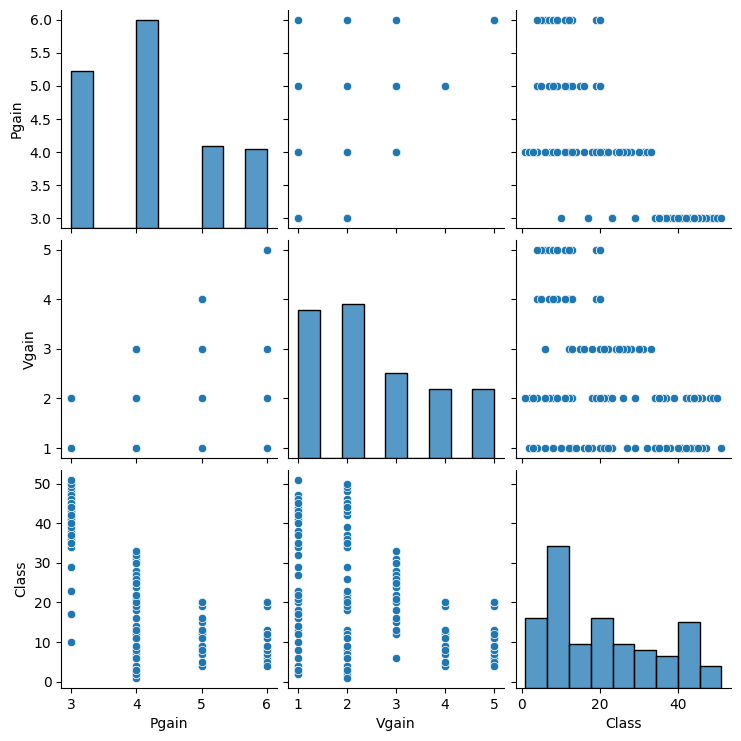

In [124]:
sns.pairplot(data)

## **Data Preprocessing**

In [125]:
data.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [126]:
data['Motor'].value_counts()

C    40
B    36
A    36
E    33
D    22
Name: Motor, dtype: int64

In [127]:
data.replace({'Motor': {'A':0,'B':1, 'C':2,'D': 3,'E':4}},inplace = True)

In [128]:
data.replace({'Screw': {'A':0,'B':1, 'C':2,'D': 3,'E':4}}, inplace = True)

In [129]:
data['Motor'].value_counts()

2    40
1    36
0    36
4    33
3    22
Name: Motor, dtype: int64

In [130]:
data['Screw'].value_counts()

0    42
1    35
2    31
3    30
4    29
Name: Screw, dtype: int64

In [131]:
data['Class']

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

## **Defining Dependent and Independent Variable**

In [132]:
X = data[['Motor', 'Screw', 'Pgain', 'Vgain']]
y = data['Class']

## **Train Test data split**

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=2529)

In [135]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

## **Fit data into model**

In [136]:
from sklearn.linear_model import LinearRegression


In [137]:
model = LinearRegression()

In [138]:
model.fit(X_train, y_train)

LinearRegression()

## **Model Prediction**

In [139]:
y_pred = model.predict(X_test)

In [140]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

## **Model Evaluation and Accuracy**

In [141]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [142]:
r2_score(y_test, y_pred)

0.6807245170563927

In [143]:
mean_squared_error(y_test, y_pred)

66.03589175595563

In [144]:
mean_absolute_error(y_test, y_pred)

7.190539677251235

In [145]:
mean_absolute_percentage_error(y_test, y_pred)

0.8268204638174629

## **Actual vs Predicted Visualization**

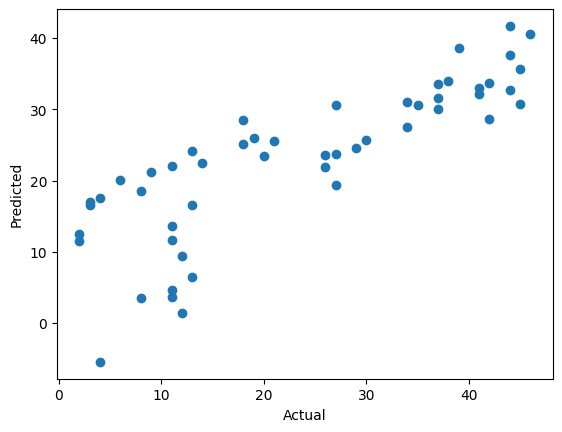

In [146]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()